In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def distance_fromV(work_function_eV, I_t_pA, voltage_V):
    """Calculate distance as a function of bias voltage V from STM tip

    Args:
        work_function_eV (_type_): _description_
        I_t_pA (_type_): _description_
        voltage_V (_type_): _description_

    Returns:
        _type_: _description_
    """
    charge = 1.602e-19 # elementary charge
    dos = 9.66e10 # typical density of states - I = 100pA, V = 0.5V, z = 2 angstrom, phi = 4.5eV
    distance_ang = -(40/(41*np.sqrt(work_function_eV))) * np.log(I_t_pA*1e-12 /(voltage_V * charge * dos))
    return distance_ang

def calculateE_feedbackon(V_series, I_pA, phi):
    
    E_series_feedbackon = []
    
    for voltage in V_series:
        distance = distance_fromV(phi, I_pA, voltage)
        
        E_field_Vcm = voltage / (distance*1e-8) # parallel plate capacitors - E = voltage / distance [v/cm]  
        E_series_feedbackon.append(E_field_Vcm)
    
    return E_series_feedbackon # in V/cm

def calculateE_feedbackoff(V_series, height_angstrom):
 
    E_series_feedbackoff = []
    height_cm = height_angstrom / 1e8
    
    for voltage in V_series:
        E = voltage / height_cm
        E_series_feedbackoff.append(E)
    
    return E_series_feedbackoff # in V/cm

In [21]:
def plotField_Voltage_Dependance(work_function_eV, I_t_pA, endVoltage, plot=True):
    """Plot E field / bias voltage dependance for bias voltage on/off

    Args:
        work_function_eV (_type_): _description_
        I_t_pA (_type_): _description_
        endVoltage (_type_): _description_
        plot (bool, optional): _description_. Defaults to True.

    Returns:
        _type_: _description_
    """

    V_series = np.linspace(0,endVoltage, 10000)
    d_series = []
    E_series_feedbackon = [] # assuming parallel plate capacitors, E = V / d
    E_series_feedbackoff = []

    for voltage in V_series:
        distance = distance_fromV(work_function_eV, I_t_pA, voltage)
        d_series.append(distance) # distance in angstrom
        
        E_field_Vcm = voltage / (distance*1e-8) # parallel plate capacitors - E = voltage / distance [v/cm]  
        E_series_feedbackon.append(E_field_Vcm)


    height_angstrom = 2
    E_series_feedbackoff = []
    height_cm = height_angstrom / 1e8
    
  
    if plot:
        # plt.figure(figsize=(10, 6))
        # plt.plot(V_series, d_series, label=f'I = {I_t_pA}pA')
        # plt.xlabel('Bias voltage [V]')
        # plt.ylabel('Distance [angstrom]')
        # plt.title('Distance / bias dependance from STM operating in constant current mode')
        # plt.legend()
        # # plt.xscale('log')
        # # plt.xlim(-0.1,0.1)
        # plt.ylim(0)
        # plt.grid(True)
        # plt.show()
        
        plt.figure(figsize=(10, 6))
        
        I_values = [10, 50, 100]
        for I in I_values:
            E_series_feedbackon = calculateE_feedbackon(V_series, I, 4.5)
            plt.plot(V_series, E_series_feedbackon , label=f'Const. current I = {I}pA')
        
        z_series = [1,2,5]
        for z in z_series:
            E_series_feedbackoff = calculateE_feedbackoff(V_series, z)
            plt.plot(V_series, E_series_feedbackoff, label=f'Const. height z = {z} angstrom')
        plt.xlabel('Bias voltage [V]')
        plt.ylabel('Electric field [V/cm]')
        plt.title(f'Electric field / bias voltage dependance, $\phi = $4.5eV, $g_s$ = 9.66e10')
        plt.legend()
        plt.xlim(0)
        plt.ylim(0)
        plt.grid(True)
        plt.show()
    
    return E_field_Vcm, V_series
    

/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_40499/1288271592.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  distance_ang = -(40/(41*np.sqrt(work_function_eV))) * np.log(I_t_pA*1e-12 /(voltage_V * charge * dos))
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_40499/1288271592.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  distance_ang = -(40/(41*np.sqrt(work_function_eV))) * np.log(I_t_pA*1e-12 /(voltage_V * charge * dos))
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_40499/1288271592.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  distance_ang = -(40/(41*np.sqrt(work_function_eV))) * np.log(I_t_pA*1e-12 /(voltage_V * charge * dos))


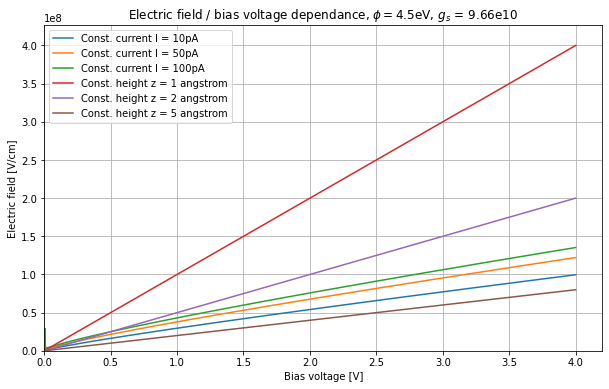

(135302473.45670694,
 array([0.00000000e+00, 4.00040004e-04, 8.00080008e-04, ...,
        3.99919992e+00, 3.99959996e+00, 4.00000000e+00]))

In [22]:
plotField_Voltage_Dependance(4.5, 100, 4)

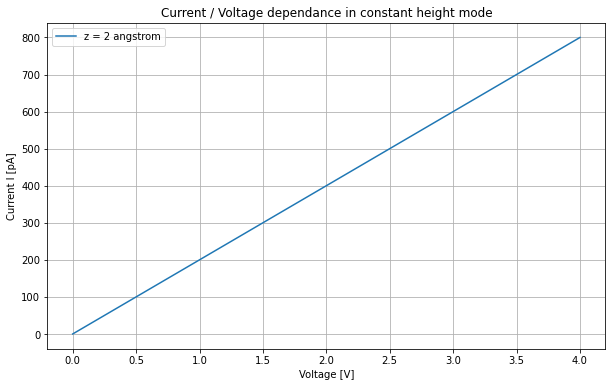

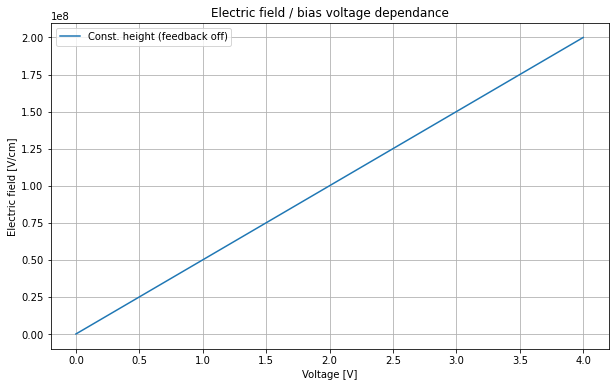

(array([0.        , 0.004004  , 0.00800801, 0.01201201, 0.01601602,
        0.02002002, 0.02402402, 0.02802803, 0.03203203, 0.03603604,
        0.04004004, 0.04404404, 0.04804805, 0.05205205, 0.05605606,
        0.06006006, 0.06406406, 0.06806807, 0.07207207, 0.07607608,
        0.08008008, 0.08408408, 0.08808809, 0.09209209, 0.0960961 ,
        0.1001001 , 0.1041041 , 0.10810811, 0.11211211, 0.11611612,
        0.12012012, 0.12412412, 0.12812813, 0.13213213, 0.13613614,
        0.14014014, 0.14414414, 0.14814815, 0.15215215, 0.15615616,
        0.16016016, 0.16416416, 0.16816817, 0.17217217, 0.17617618,
        0.18018018, 0.18418418, 0.18818819, 0.19219219, 0.1961962 ,
        0.2002002 , 0.2042042 , 0.20820821, 0.21221221, 0.21621622,
        0.22022022, 0.22422422, 0.22822823, 0.23223223, 0.23623624,
        0.24024024, 0.24424424, 0.24824825, 0.25225225, 0.25625626,
        0.26026026, 0.26426426, 0.26826827, 0.27227227, 0.27627628,
        0.28028028, 0.28428428, 0.28828829, 0.29

In [5]:
# Now calculate graphs for feedback off

#Using set points: V = 0.5V, z = 2 angstrom

def I_fixed_height(V_series, plot=True):
    I_series = []
    e_charge = 1.602e-19
    dos = 9.66e10
    z = 2
        
    for voltage in V_series:
        I = e_charge * voltage * dos * np.exp(-1.025 * np.sqrt(4.5) * 2)
        I_series.append(I*1e12)
        
        
    E_series = []
    height_cm = z / 1e8
    for voltage in V_series:
        E = voltage / height_cm
        E_series.append(E)
        
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(V_series, I_series , label=f'z = {2} angstrom')
        plt.xlabel('Voltage [V]')
        plt.ylabel('Current I [pA]')
        plt.title('Current / Voltage dependance in constant height mode')
        plt.legend()
        # plt.xlim(2)
        # plt.ylim(0)
        plt.grid(True)
        plt.show()
    
        plt.figure(figsize=(10, 6))
        plt.plot(V_series, E_series, label='Const. height (feedback off)')
        plt.xlabel('Voltage [V]')
        plt.ylabel('Electric field [V/cm]')
        plt.title('Electric field / bias voltage dependance')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return V_series, E_series
    
I_fixed_height(np.linspace(0,4,1000))

# Plot field, V / distance

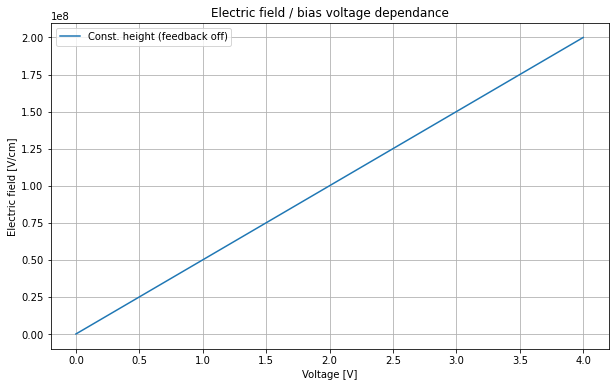

In [6]:
def E_field_fixed_height(V_series, height_angstrom):
    
    E_series = []
    height_cm = height_angstrom / 1e8
    
    for voltage in V_series:
        E = voltage / height_cm
        E_series.append(E)
        
    # plot E / distance in angstrom
    
    plt.figure(figsize=(10, 6))
    plt.plot(V_series, E_series, label='Const. height (feedback off)')
    plt.xlabel('Voltage [V]')
    plt.ylabel('Electric field [V/cm]')
    plt.title('Electric field / bias voltage dependance')
    plt.legend()
    plt.grid(True)
    plt.show()

E_field_fixed_height(np.linspace(0,4, 1000), 2)